<a href="https://colab.research.google.com/github/RYeeshuDhurandhar/ES-654-Machine-Learning/blob/main/PrerequisiteTest/MLPrerequsiteTest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing required libraries

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time

import jax
import jax.numpy as jnp
from jax import grad
import sympy as sp

# to see plots in notebook
%matplotlib inline  

## Question 1

**How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.**

Number of multiplication needed: **nxmxk**
<br/>
Number of addition needed: **nxmx(k-1)**

Lets we have:
<br/>
matrix1: (n, k)
<br/>
matrix2: (k, m)

Each row of matrix1 has to be multiplied with each column of matrix2, making nxm total operations which corresponds to nxm resultant matrix.
For each such operations, we need k number of multiplications (k elements in a row of matrix1 multiples with k elements of a column of matrix2). Therefore, for nxm operations, we have nxmxk multiplications. 

To add all the k multiplied numbers, we need k-1 addition for one operation. Therefore, for nxm operations, we have nxmx(k-1) additions. 

## Question 2

**Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?**

In [2]:
# initializing the dimensions of the matrix
n=4
k=5
m=3

# generating random matrices
mat1 = np.random.randint(1,100,(n,k))
mat2 = np.random.randint(1,100,(k,m))
mat3 = np.zeros((n,m))      # to store the results after multiplication

# finding size of matrices
size1 = mat1.shape
size2 = mat2.shape

# converting arrays to lists
mat1 = list(mat1)
mat2 = list(mat2)
mat3 = list(mat3)

In [3]:
# Case1: using for loop and list

sum_time = 0    # to sum the time required for running each test
no_itr = 10000  # number of tests to calculate average time

for itr in range(no_itr):
    tic = time.time()
    for i in range(0,n):    # matrix multiplication
        for l in range(0,m):
            for j in range(0,k):
                mat3[i][l] += mat1[i][j]*mat2[j][l]
    toc = time.time()
    sum_time += toc-tic
print('Average Time (in ms) for matrix multiplication using defined function and list:', sum_time*1000/no_itr)

Average Time (in ms) for matrix multiplication using defined function and list: 0.054959678649902345


In [4]:
# Case2: using for loop and numpy array

# converting lists to arrays
mat1 = np.array(mat1)
mat2 = np.array(mat2)
mat3 = np.array(mat3)

sum_time = 0
no_itr = 10000  # number of tests to calculate average time

for itr in range(no_itr):
    tic = time.time()
    for i in range(0,n):    # matrix multiplication
        for l in range(0,m):
            for j in range(0,k):
                mat3[i][l] += mat1[i][j]*mat2[j][l]
    toc = time.time()
    sum_time += toc-tic
print('Average Time (in ms) for matrix multiplication using defined function and numpy array:', sum_time*1000/no_itr)

Average Time (in ms) for matrix multiplication using defined function and numpy array: 0.09632692337036133


In [5]:
# Case3: using np.dot() function

sum_time = 0
no_itr = 10000  # number of tests to calculate average time

for itr in range(no_itr):
    tic = time.time()
    mat3 = np.dot(mat1, mat2)   # matrix multiplication
    toc = time.time()
    sum_time += toc-tic
print('Average Time (in ms) to calculate matrix multiplication using pre-defined np.dot() function:', sum_time*1000/no_itr)

Average Time (in ms) to calculate matrix multiplication using pre-defined np.dot() function: 0.0024955034255981444


Observations:

There is not much difference when we use array (Case1) or list (Case2) in case of for loop based multiplication, since both uses for loops.

There is significant reduction in time when used of np.dot() function (Case3) because:
- in the case of loops, it is implemented in high level language and the speed of computation is constrained by python interpreter.
- in case of np.dot() function, it is implemented in C which is much faster than python. As per my reading through different sources, I got to know that for operations involving linear algebra, numpy uses highly optimized C and Fortran libraries. These libraries are made to handle matrix operations on a variety of hardware architectures.

## Question 3

**Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array?** 

**Can you suggest a better method?**

**Can you implement both these methods in Python and compare against numpy.median routine in terms of time?**

Using the first method on array having n elements, we need to travers the array n/2 time for finding the median, and each time, we are traversing through n elements, therefore, time complexity = O(n^2).

We can use sorting algorithms which has time complexity of O(nlogn), such as quick sort, merge sort, heap sort, etc.

In [6]:
# initializing array of random integers betwee [1,100) of size 100
ar = np.random.randint(1,100,100)

In [7]:
# Function to find the median using given method
# this code handles array having repeated elements

def findMedian(ar):
    s = set()       # to store the index of last_max elements 
    max = ar[0]
    max_idx = 0     
    n = len(ar)

    # finding max element of the array
    for i in range(n):
        if ar[i]>max:
            max = ar[i]
            max_idx = i

    last_max = max
    s.add(max_idx)

    # finding other elemnts in decreasing order
    for i in range(1, int(n/2)+1):
        temp = 0
        temp_idx = 0
        for j in range(0,n):
            if (ar[j] <= last_max) and (j not in s) and (ar[j] >= temp):
                temp = ar[j]
                temp_idx = j
        last_max = temp
        s.add(temp_idx)
        if(n % 2 == 0 and i == (n/2 - 1)):
            mid1 = last_max     # if number of elements == even, storing one of the middle element

    if n % 2 == 0:
        median = (mid1 + last_max) / 2  # average of the two middle elements
    else:
        median = last_max  # middle element
#     return median     # uncomment this to see the resultant median

findMedian(ar)

In [8]:
# Quick sort
# Reference: GeeksForGeeks Documentation

# to find partition project
def partition(ar, low, high):
    i = low - 1
    pivot = ar[high]

    for j in range(low, high):
        if ar[j] <= pivot:
            i = i + 1
            temp = ar[i]
            ar[i] = ar[j]
            ar[j] = temp
            
    temp = ar[i + 1]
    ar[i + 1] = ar[high]
    ar[high] = temp

    return i + 1

# performing quick sort using above function
def quickSort(ar, low, high):
    if low < high:
        piv = partition(ar, low, high)
        quickSort(ar, low, piv - 1)
        quickSort(ar, piv + 1, high)

n = len(ar)
quickSort(ar, 0, n - 1)
 
if n % 2 == 0:
    median = (ar[n // 2] + ar[n // 2 - 1]) / 2  # if n==even -> average of the two middle elements
else:
    median = ar[n // 2]  # if n==odd -> middle element
        
print('Median using Quick Sort:', median)

Median using Quick Sort: 49.5


In [9]:
np.median(ar)

49.5

In [10]:
# Comparing time
no_itr = 1000         # number of tests to find average time

#### Method1 ####
time_sum = 0
for itr in range(no_itr):
    ar = np.random.randint(1,100,100)
    tic = time.time()       # start time for each test
    
    findMedian(ar)
        
    toc = time.time()
    time_sum += toc-tic      # end time for each test
print('Average time (in ms) using the given algorithm:', time_sum*1000/no_itr)
    
    
#### Method2 ####

time_sum = 0
for itr in range(no_itr):
    ar = np.random.randint(1,100,100)
    n = len(ar)
    tic = time.time()
    
    quickSort(ar, 0, n - 1)
    if n % 2 == 0:
        median = (ar[n // 2] + ar[n // 2 - 1]) / 2
    else:
        median = ar[n // 2]
        
    toc = time.time()
    time_sum += toc-tic
print('Average time (in ms) using Quick Sort:', time_sum*1000/no_itr)


#### Method3 ####

time_sum = 0
for itr in range(no_itr):
    ar = np.random.randint(1,100,100)
    tic = time.time()
    
    np.median(ar)
        
    toc = time.time()
    time_sum += toc-tic
print('Average time (in ms) using Numpy median:', time_sum*1000/no_itr)

Average time (in ms) using the given algorithm: 1.5032341480255127
Average time (in ms) using Quick Sort: 0.36490917205810547
Average time (in ms) using Numpy median: 0.02776169776916504


Observation:
- average time using given algorithm is maximum since $O(n^2)$.
- average time using quick sort is lesser than given algrithm since O(nlogn).
- average time using numpy median is minimum because it uses highly optimized C and Fortain based libraries for operations.

## Question 4

**What is the gradient of the following function with respect to x and y?**

$$x^2y + y^3 sin(x)$$

Gradient w.r.t. x: 

$2xy + y^3 cos(x)$

Gradient w.r.t. y:

$x^2 + 3y^2sin(x)$

## Question 5

**Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y**

In [11]:
n = 10
x = np.random.randn(n)    # initializing array from normal distribution for testing since JAX require float
y = np.random.randn(n)
x *= 15                   # multiplied by a number to spread the numbers
y *= 17

In [12]:
# definig given function
def func(input):
    return ((input[0]**2)*input[1] + (input[1]**3)*jnp.sin(input[0]))

print('\nGradient calculated using JAX\n')

# calculating gradient for each tests
for i in range(n):
  input = jnp.array([x[i],y[i]])
  gradient = jax.grad(func)
  print(f'Test  {i}:', '\t', f'df_dx: {gradient(input)[0]},', '\t', f'df_dy: {gradient(input)[1]}')

print('\nGradient calculated using derivative of the given function\n')

# printing calculated gradient for each tests
for i in range(n):
  print(f'Test  {i}:', '\t', 'df_dx:', 2*x[i]*y[i] + (y[i]**3)*np.cos(x[i]), '\t', 'df_dy:', x[i]**2 + 3*(y[i]**2)*np.sin(x[i]))


Gradient calculated using JAX

Test  0: 	 df_dx: -707.1538696289062, 	 df_dy: -453.0492248535156
Test  1: 	 df_dx: -182.56607055664062, 	 df_dy: 1168.0826416015625
Test  2: 	 df_dx: -1711.2275390625, 	 df_dy: 495.6048889160156
Test  3: 	 df_dx: 9331.84765625, 	 df_dy: 424.58203125
Test  4: 	 df_dx: 60377.56640625, 	 df_dy: -3154.4501953125
Test  5: 	 df_dx: -18.06975746154785, 	 df_dy: 43.70539855957031
Test  6: 	 df_dx: 7803.53955078125, 	 df_dy: -235.65219116210938
Test  7: 	 df_dx: 2142.50341796875, 	 df_dy: -886.9456176757812
Test  8: 	 df_dx: 1767.288330078125, 	 df_dy: 167.50067138671875
Test  9: 	 df_dx: 183.9699249267578, 	 df_dy: -354.7041015625

Gradient calculated using derivative of the given function

Test  0: 	 df_dx: -707.1542623228877 	 df_dy: -453.04921634080864
Test  1: 	 df_dx: -182.56606850864864 	 df_dy: 1168.082626609153
Test  2: 	 df_dx: -1711.2274232139412 	 df_dy: 495.60498186882495
Test  3: 	 df_dx: 9331.847978541573 	 df_dy: 424.58180663577053
Test  4: 	 df_

As it can be seen from the above results, gradient evaluated by our method and the analytical solution got using JAX are very close (upto three decimal places).

## Question 6

**Use sympy to confirm that you obtain the same gradient analytically.**

In [13]:
x, y = sp.symbols('x y')

f = (x**2)*y + (y**3)*sp.sin(x)     # used sp, not np

# finding derivative
df_dx = sp.diff(f, x)
df_dy = sp.diff(f, y)

print(f"The result got using sympy: df/dx = {df_dx}, df/dy = {df_dy}")

The result got using sympy: df/dx = 2*x*y + y**3*cos(x), df/dy = x**2 + 3*y**2*sin(x)


It can be seen that the result got from the sympy matches with the calculated gradient.

## Question 7

**Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks.**

In [14]:
d = {
    2022:
        {
            "Branch 1":
                {
                    "Roll Number": 1,
                    "Name": "N",
                    "Marks": {"Maths": 100, "English": 70}
                },
            "Branch 2": {}
        },
    2023: {"Branch 1": {}, "Branch 2": {}},
    2024: {"Branch 1": {}, "Branch 2": {}},
    2025: {"Branch 1": {}, "Branch 2": {}}
    }

## Question 8

**Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.**

In [15]:
# names starting with small letters are variables
# names starting with capital letters are classes
# used concept of inner classes for the given question

class Database:                                               # Database class to store all the information
    def __init__(self):
        self.yearList: self.Year = []                         # creating year list using Year class 
    def addYear(self, year):                                  # to add a new year
        year = self.Year(year)
        self.yearList.append(year)      
    def showYearList(self):                                   # to return year list
        return self.yearList

    class Year:                                               # class to store Year
        def __init__(self, year):
            self.year = year
            self.branchList: self.Branch = []                 # creating branch list using Branch class
        def addBranch(self, branch):                          # to add a new branch
            branch = self.Branch(branch)
            self.branchList.append(branch)
        def showBranchList(self):                             # to return branch list
            return self.branchList

        class Branch:                                         # class to store Branch
            def __init__(self, branch):
                self.branch = branch
                self.studentList: self.Student = []           # creating student list using Student class
            def addStudent(self, rollNo, name):               # to add a new student
                student = self.Student(rollNo, name)
                self.studentList.append(student)
            def showStudentList(self):                        # to return student list
                return self.studentList
    
            class Student:                                    # class to store Student details
                def __init__(self, rollNo, name):
                    self.rollNo = rollNo
                    self.name = name
                    self.marksList: self.Marks = []           # creating marks list using Marks class 
                def addMarks(self, subjectName, marks):       # to add a new subject and its marks
                    marks = self.Marks(subjectName, marks)
                    self.marksList.append(marks)
                def showMarksList(self):                      # return subject and marks list
                    return self.marksList
                
                class Marks:                                  # class to store subject and corresponding marks
                    def __init__(self, subjectName, marks):
                        self.subjectName = subjectName
                        self.marks = marks

In [16]:
# Another method using inheritance

class Marks:
    def __init__(self, subjectName, marks):
        self.subjectName = subjectName
        self.marks = marks
        
class Student:
    def __init__(self, rollNo, name):
        self.rollNo = rollNo
        self.name = name
        self.marksList: Marks = []
    def addMarks(self, subjectName, marks):
        marks = Marks(subjectName, marks)
        self.marksList.append(marks)
    def showMarksList(self):
        return self.marksList

class Branch:
    def __init__(self, branch):
        self.branch = branch
        self.studentList: Student = []
    def addStudent(self, rollNo, name):
        student = Student(rollNo, name)
        self.studentList.append(student)
    def showStudentList(self):
        return self.studentList

class Year:
    def __init__(self, year):
        self.year = year
        self.branchList: Branch = []
    def addBranch(self, branch):
        branch = Branch(branch)
        self.branchList.append(branch)
    def showBranchList(self):
        return self.branchList
    
class Database:
    def __init__(self):
        self.yearList: Year = []
    def addYear(self, year):
        year = Year(year)
        self.yearList.append(year)
    def showYearList(self):
        return self.yearList

In [17]:
# initializing all the given information

db = Database()                             # creating object of class Database

db.addYear(2022)                            # adding years
db.addYear(2023)
db.addYear(2024)
db.addYear(2025)

years = db.showYearList()
years[0].addBranch('Branch 1')              # adding branches for year 2022
years[0].addBranch('Branch 2')

branches = years[0].showBranchList()
branches[0].addStudent(1, 'N')              # adding a student in year 2022 Branch 1

students = branches[0].showStudentList()
students[0].addMarks('Maths',100)           # adding student details for student in year 2022 Branch 1
students[0].addMarks('English', 70)

years[1].addBranch('Branch 1')              # adding branches for year 2023
years[1].addBranch('Branch 2')

years[2].addBranch('Branch 1')              # adding branches for year 2023
years[2].addBranch('Branch 2')

years[3].addBranch('Branch 1')              # adding branches for year 2023
years[3].addBranch('Branch 2')

In [18]:
# another method for initializing all the given information - combined different lines from above implimentation

db = Database()

db.addYear(2022)
db.addYear(2023)
db.addYear(2024)
db.addYear(2025)

db.showYearList()[0].addBranch('Branch 1')
db.showYearList()[0].addBranch('Branch 2')
db.showYearList()[0].showBranchList()[0].addStudent(1, 'N')
db.showYearList()[0].showBranchList()[0].showStudentList()[0].addMarks('Maths',100)
db.showYearList()[0].showBranchList()[0].showStudentList()[0].addMarks('English', 70)

db.showYearList()[1].addBranch('Branch 1')
db.showYearList()[1].addBranch('Branch 2')

db.showYearList()[2].addBranch('Branch 1')
db.showYearList()[2].addBranch('Branch 2')

db.showYearList()[3].addBranch('Branch 1')
db.showYearList()[3].addBranch('Branch 2')

In [19]:
# printing the stored information

print('year=2022 -> Branch 1 -> Student1 -> name:', '\t', '\t', db.showYearList()[0].showBranchList()[0].showStudentList()[0].name)
print('year=2022 -> Branch 1 -> Student1 -> rollNo:', '\t', '\t', db.showYearList()[0].showBranchList()[0].showStudentList()[0].rollNo)
print('year=2022 -> Branch 1 -> Student1 -> subject1:', '\t', '\t', db.showYearList()[0].showBranchList()[0].showStudentList()[0].showMarksList()[0].subjectName)
print('year=2022 -> Branch 1 -> Student1 -> subject1 -> marks: ', db.showYearList()[0].showBranchList()[0].showStudentList()[0].showMarksList()[0].marks)
for year in db.showYearList():
    print(year.year)

year=2022 -> Branch 1 -> Student1 -> name: 	 	 N
year=2022 -> Branch 1 -> Student1 -> rollNo: 	 	 1
year=2022 -> Branch 1 -> Student1 -> subject1: 	 	 Maths
year=2022 -> Branch 1 -> Student1 -> subject1 -> marks:  100
2022
2023
2024
2025


## Question 9

**Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.**

In [20]:
x = np.arange(0.5, 100.5, 0.5)
x

array([  0.5,   1. ,   1.5,   2. ,   2.5,   3. ,   3.5,   4. ,   4.5,
         5. ,   5.5,   6. ,   6.5,   7. ,   7.5,   8. ,   8.5,   9. ,
         9.5,  10. ,  10.5,  11. ,  11.5,  12. ,  12.5,  13. ,  13.5,
        14. ,  14.5,  15. ,  15.5,  16. ,  16.5,  17. ,  17.5,  18. ,
        18.5,  19. ,  19.5,  20. ,  20.5,  21. ,  21.5,  22. ,  22.5,
        23. ,  23.5,  24. ,  24.5,  25. ,  25.5,  26. ,  26.5,  27. ,
        27.5,  28. ,  28.5,  29. ,  29.5,  30. ,  30.5,  31. ,  31.5,
        32. ,  32.5,  33. ,  33.5,  34. ,  34.5,  35. ,  35.5,  36. ,
        36.5,  37. ,  37.5,  38. ,  38.5,  39. ,  39.5,  40. ,  40.5,
        41. ,  41.5,  42. ,  42.5,  43. ,  43.5,  44. ,  44.5,  45. ,
        45.5,  46. ,  46.5,  47. ,  47.5,  48. ,  48.5,  49. ,  49.5,
        50. ,  50.5,  51. ,  51.5,  52. ,  52.5,  53. ,  53.5,  54. ,
        54.5,  55. ,  55.5,  56. ,  56.5,  57. ,  57.5,  58. ,  58.5,
        59. ,  59.5,  60. ,  60.5,  61. ,  61.5,  62. ,  62.5,  63. ,
        63.5,  64. ,

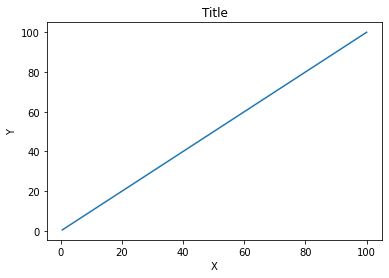

In [21]:
# 1

y = x

plt.plot(x, y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Title')
plt.show()

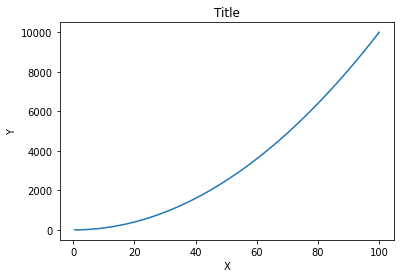

In [22]:
# 2

y = x**2

plt.plot(x, y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Title')
plt.show()

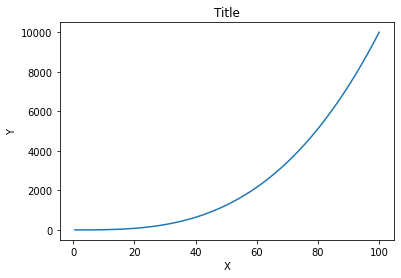

In [23]:
# 3

y = (x**3) / 100

plt.plot(x, y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Title')
plt.show()

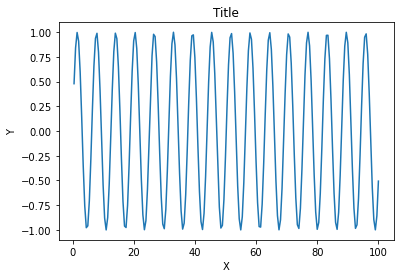

In [24]:
# 4

y = np.sin(x)

plt.plot(x, y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Title')
plt.show()

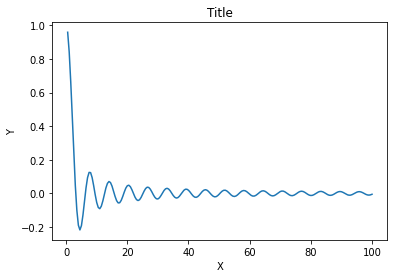

In [25]:
# 5

y = np.sin(x) / x

plt.plot(x, y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Title')
plt.show()

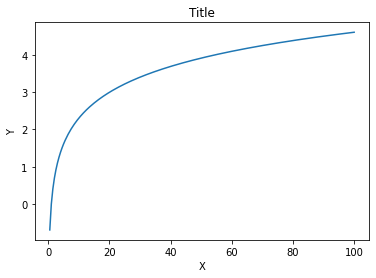

In [26]:
# 6

y = np.log(x)

plt.plot(x, y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Title')
plt.show()

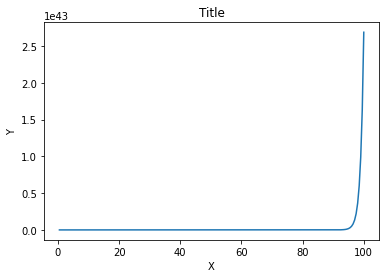

In [27]:
# 7

y = np.exp(x)

plt.plot(x, y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Title')
plt.show()

## Question 10

**Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2.**

**Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.**

In [28]:
# Generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2

mat = np.random.uniform(low=1, high=2, size=(20,5))
mat

array([[1.00979568, 1.97140324, 1.52694172, 1.46973475, 1.53439551],
       [1.91148688, 1.89506631, 1.65137816, 1.26204513, 1.48318917],
       [1.21678001, 1.9731397 , 1.99708043, 1.64638099, 1.01134296],
       [1.03334707, 1.72812292, 1.85784965, 1.03713101, 1.01788984],
       [1.87122923, 1.81614289, 1.42529074, 1.10214548, 1.96686033],
       [1.08320791, 1.87021096, 1.72605953, 1.36331247, 1.73431714],
       [1.66203965, 1.93473975, 1.0486785 , 1.88368888, 1.27944273],
       [1.28143297, 1.18510607, 1.7604427 , 1.98329886, 1.17162088],
       [1.82905195, 1.46036997, 1.44319208, 1.78936026, 1.38466151],
       [1.05634627, 1.41403212, 1.92572857, 1.36938349, 1.5606071 ],
       [1.97830037, 1.93306904, 1.17569136, 1.18255363, 1.19038361],
       [1.64725255, 1.43434713, 1.90878335, 1.37766809, 1.32656712],
       [1.27397336, 1.73108378, 1.55564851, 1.5753017 , 1.77127998],
       [1.87633561, 1.73155119, 1.31549989, 1.19866275, 1.36540128],
       [1.52501188, 1.13453999, 1.

In [29]:
# Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”

df = pd.DataFrame(mat, columns=['a', 'b', 'c', 'd', 'e'])
df

,a,b,c,d,e
0,1.009796,1.971403,1.526942,1.469735,1.534396
1,1.911487,1.895066,1.651378,1.262045,1.483189
2,1.216780,1.973140,1.997080,1.646381,1.011343
3,1.033347,1.728123,1.857850,1.037131,1.017890
4,1.871229,1.816143,1.425291,1.102145,1.966860
5,1.083208,1.870211,1.726060,1.363312,1.734317
6,1.662040,1.934740,1.048678,1.883689,1.279443
7,1.281433,1.185106,1.760443,1.983299,1.171621
8,1.829052,1.460370,1.443192,1.789360,1.384662
9,1.056346,1.414032,1.925729,1.369383,1.560607


In [30]:
# Find the column with the highest standard deviation

print(df.std().idxmax())

a


In [31]:
# Find the row with the lowest mean

print(df.mean(axis=1).idxmin())

15


## Question 11

**Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”.**

**Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise.**

**Find the number of rows in the dataframe where the value in the column “g” is “LT8”.**

**Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.**

In [32]:
# Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”.

df['f'] = 0    # added this because when we run the below function multiple time, it adds the value of f calculated in last run
df['f'] = df.sum(axis=1)
df

,a,b,c,d,e,f
0,1.009796,1.971403,1.526942,1.469735,1.534396,7.512271
1,1.911487,1.895066,1.651378,1.262045,1.483189,8.203166
2,1.216780,1.973140,1.997080,1.646381,1.011343,7.844724
3,1.033347,1.728123,1.857850,1.037131,1.017890,6.674340
4,1.871229,1.816143,1.425291,1.102145,1.966860,8.181669
5,1.083208,1.870211,1.726060,1.363312,1.734317,7.777108
6,1.662040,1.934740,1.048678,1.883689,1.279443,7.808590
7,1.281433,1.185106,1.760443,1.983299,1.171621,7.381901
8,1.829052,1.460370,1.443192,1.789360,1.384662,7.906636
9,1.056346,1.414032,1.925729,1.369383,1.560607,7.326098


In [33]:
# Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise.

df['g'] = np.where(df['f']<8, 'LT8', 'GT8')
df

,a,b,c,d,e,f,g
0,1.009796,1.971403,1.526942,1.469735,1.534396,7.512271,LT8
1,1.911487,1.895066,1.651378,1.262045,1.483189,8.203166,GT8
2,1.216780,1.973140,1.997080,1.646381,1.011343,7.844724,LT8
3,1.033347,1.728123,1.857850,1.037131,1.017890,6.674340,LT8
4,1.871229,1.816143,1.425291,1.102145,1.966860,8.181669,GT8
5,1.083208,1.870211,1.726060,1.363312,1.734317,7.777108,LT8
6,1.662040,1.934740,1.048678,1.883689,1.279443,7.808590,LT8
7,1.281433,1.185106,1.760443,1.983299,1.171621,7.381901,LT8
8,1.829052,1.460370,1.443192,1.789360,1.384662,7.906636,LT8
9,1.056346,1.414032,1.925729,1.369383,1.560607,7.326098,LT8


In [34]:
# Find the number of rows in the dataframe where the value in the column “g” is “LT8”.

sum(df['g']=='LT8')

17

In [35]:
# Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8”
df[df['g']=='LT8']['f'].std()

0.49102008607322994

In [36]:
# Find the standard deviation of the column “f” for the rows where the value in the column “g” is “GT8”

df[df['g']=='GT8']['f'].std()

0.12376331303558148

## Question 12

**Write a small piece of code to explain broadcasting in numpy**

In the below example, mat1 is 5x3 matrix and mat2 is 5x1 matrix. When they are added together, each column of mat1 is added to mat2.

In [37]:
# matrix containing elements from [1,10)
mat1 = np.random.randint(1, 10, (5,3))
mat1

array([[7, 2, 4],
       [3, 2, 7],
       [4, 6, 6],
       [2, 4, 2],
       [6, 6, 3]])

In [38]:
mat2 = np.random.randint(1, 10, (5,1))
mat2

array([[1],
       [3],
       [5],
       [5],
       [7]])

In [39]:
mat1 + mat2

array([[ 8,  3,  5],
       [ 6,  5, 10],
       [ 9, 11, 11],
       [ 7,  9,  7],
       [13, 13, 10]])

## Question 13

**Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.**

In [43]:
# creating array
ar = np.random.randint(1, 100, 10)
ar

array([84, 80, 46, 28, 45, 99, 11, 59, 14, 72])

In [44]:
# function to find argmin
def argmin(ar):
    if len(ar) == 0:              # if array is empty
        return 'Array is empty'
    min = ar[0]
    idx = 0
    for i in range(len(ar)):
        if(ar[i]<min):
            idx = i
    return idx
            
print('argmin of given array using defined function:', argmin(ar))
print('argmin of given array using np.argmin:', argmin(ar))

argmin of given array using defined function: 9
argmin of given array using np.argmin: 9
